In [1]:
import os
import json
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import measure
import skimage.io as io


def getFileName1(path,suffix):
    # get files with suffix
    input_template_All=[]
    f_list = os.listdir(path)
    for i in f_list:
        if os.path.splitext(i)[1] ==suffix:
            input_template_All.append(i)
    return input_template_All

def get_imgs(fname):
    # .nii.gz files: split twice
    fname = os.path.splitext(fname)[0]
    fname = os.path.splitext(fname)[0]
    
    img_fname = os.path.join(imgs_path, fname + "_0000.nii.gz")
    lab_fname = os.path.join(labs_path, fname + ".nii.gz")
    pre_fname = os.path.join(preds_path, fname + ".nii.gz")
    
    img = nib.load(img_fname)
    lab = nib.load(lab_fname)
    pre = nib.load(pre_fname)

    img = img.get_fdata()
    lab = lab.get_fdata()
    pre = pre.get_fdata()
    return img, lab, pre

def detect_largest_ROI(lab):
    a = np.sum(lab, axis=0)
    b = np.sum(a, axis=0)
    
    return np.argmax(b)     
        

def img_standarize(img):
    window_center = 50.0
    window_width = 300.0
    
    win_min = (2*window_center - window_width)/2.0 + 0.5  
    win_max = (2*window_center + window_width)/2.0 + 0.5    
    dFactor = 255.0/(win_max - win_min)
    
    img_win = img
    img_win[img < win_min] = win_min
    img_win[img > win_max] = win_max
    img_win = (img_win - win_min)/(win_max - win_min)
    
    return img_win


### draw Fig 4

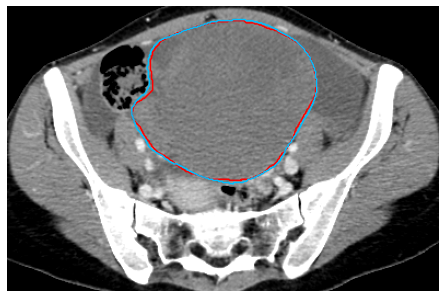

In [2]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
preds_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 140
deltay = 75
endx = 400
endy = 470

f, ax = plt.subplots()

[img, lab, pre] = get_imgs("PY396.nii.gz")
slc_ind = detect_largest_ROI(lab)
lab_rot = np.rot90(lab[:, : ,slc_ind])
pre_rot = np.rot90(pre[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])
contours_pre = measure.find_contours(pre_rot[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c1 in contours_lab:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='red')
for c2 in contours_pre:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

save_path = "./Figs/PY396.tiff"
plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches = 0)

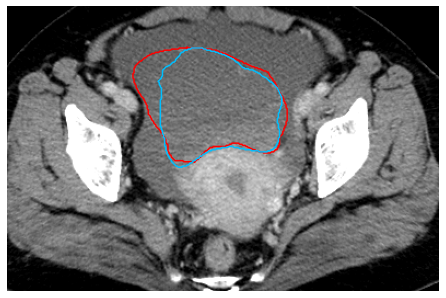

In [3]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
preds_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 140
deltay = 60
endx = 400
endy = 455

f, ax = plt.subplots()

[img, lab, pre] = get_imgs("PY409.nii.gz")
slc_ind = detect_largest_ROI(lab)
lab_rot = np.rot90(lab[:, : ,slc_ind])
pre_rot = np.rot90(pre[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])
contours_pre = measure.find_contours(pre_rot[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c1 in contours_lab:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='red')
for c2 in contours_pre:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

save_path = "./Figs/PY409.tiff"
plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches = 0)

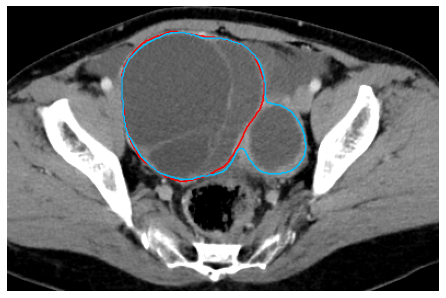

In [4]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
preds_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 160
deltay = 60
endx = 420
endy = 455

f, ax = plt.subplots()

[img, lab, pre] = get_imgs("PY378.nii.gz")
slc_ind = detect_largest_ROI(lab)
lab_rot = np.rot90(lab[:, : ,slc_ind])
pre_rot = np.rot90(pre[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])
contours_pre = measure.find_contours(pre_rot[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c1 in contours_lab:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='red')
for c2 in contours_pre:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

save_path = "./Figs/PY378.tiff"
plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches = 0)

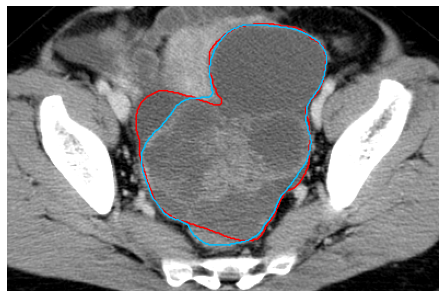

In [5]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
preds_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 140
deltay = 60
endx = 400
endy = 455

f, ax = plt.subplots()

[img, lab, pre] = get_imgs("DDR604.nii.gz")
slc_ind = detect_largest_ROI(lab)
lab_rot = np.rot90(lab[:, : ,slc_ind])
pre_rot = np.rot90(pre[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])
contours_pre = measure.find_contours(pre_rot[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c1 in contours_lab:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='red')
for c2 in contours_pre:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

save_path = "./Figs/QMH604.tiff"
plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches = 0)

In [2]:
import skimage.io as io

img1_path = './Figs/PY396.tiff'
img2_path = './Figs/PY409.tiff'
img3_path = './Figs/PY378.tiff'
img4_path = './Figs/QMH604.tiff'

im1 = io.imread(img1_path)  
im2 = io.imread(img2_path)   
im3 = io.imread(img3_path)   
im4 = io.imread(img4_path)   

print(im1.shape)   
print(im1.dtype)

(1184, 1800, 4)
uint8


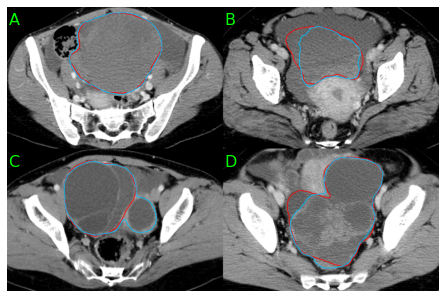

In [3]:
im = np.zeros((1184*2,1800*2,4))
im[:1184, :1800, :] = im1.copy()
im[:1184, 1800:, :] = im2.copy()
im[1184:, :1800, :] = im3.copy()
im[1184:, 1800:, :] = im4.copy()
im = np.array(im,dtype=np.uint8)

f, ax = plt.subplots()

ax.imshow(im)

plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

plt.text(10, 150, "A", size=16, color='lime')
plt.text(1810, 150, "B", size=16, color='lime')
plt.text(10, 1334, "C", size=16, color='lime')
plt.text(1810, 1334, "D", size=16, color='lime')

save_path = "./Figs/Fig4.tiff"
plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches = 0)


### draw Fig 6

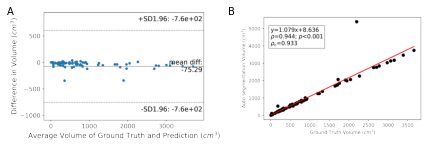

In [8]:
import skimage.io as io
from skimage.transform import resize
import matplotlib.pyplot as plt

img1_path = './Fig6a.tiff'
img2_path = './Fig6b.tiff'

im1 = io.imread(img1_path)  
im2 = io.imread(img2_path)

im = np.zeros((1575, 2554*2,4))
im[:, :2554, :] = im1.copy()
im[55:1520, 2726:4935, :] = im2.copy()

im = np.array(im,dtype=np.uint8)

f, ax = plt.subplots()
ax.imshow(im)

plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)


plt.text(0, 60, "A", size=10)
plt.text(2610, 60, "B", size=10)


save_path = "./Figs/Fig6.tiff"
plt.savefig(save_path, dpi=600, bbox_inches='tight', pad_inches = 0)

### draw Fig 3

In [2]:
def get_imgs_masks(fname):
    # .nii.gz files: split twice
    fname = os.path.splitext(fname)[0]
    fname = os.path.splitext(fname)[0]
    
    img_fname = os.path.join(imgs_path, fname + "_0000.nii.gz")
    lab_fname = os.path.join(labs_path, fname + ".nii.gz")
    
    img = nib.load(img_fname)
    lab = nib.load(lab_fname)
    return [img.get_fdata(), lab.get_fdata()]


def get_preds(fname):
    # .nii.gz files: split twice
    fname = os.path.splitext(fname)[0]
    fname = os.path.splitext(fname)[0]
    
    pre_fname1 = os.path.join(pred1_path, fname + ".nii.gz")
    pre_fname2 = os.path.join(pred2_path, fname + ".nii.gz")
    pre_fname3 = os.path.join(pred3_path, fname + ".nii.gz")
    pre_fname4 = os.path.join(pred4_path, fname + ".nii.gz")
    
    pre1 = nib.load(pre_fname1)
    pre2 = nib.load(pre_fname2)
    pre3 = nib.load(pre_fname3)
    pre4 = nib.load(pre_fname4)

    return [pre1.get_fdata(), pre2.get_fdata(), pre3.get_fdata(), pre4.get_fdata()]

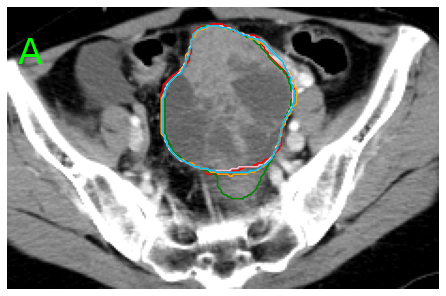

In [3]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
pred1_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_2d/"
pred2_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_lowres/"
pred3_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_fullres/"
pred4_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 80
deltay = 30
endx = 230
endy = 260

f, ax = plt.subplots()

[img, lab] = get_imgs_masks("DDR653.nii.gz")
preds = get_preds("DDR653.nii.gz")

slc_ind = 20
lab_rot = np.rot90(lab[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])

pre1 = preds[0]
pre1 = np.rot90(pre1[:, : ,slc_ind])
contours_pre1 = measure.find_contours(pre1[deltax:endx, deltay:endy])
pre2 = preds[1]
pre2 = np.rot90(pre2[:, : ,slc_ind])
contours_pre2 = measure.find_contours(pre2[deltax:endx, deltay:endy])
pre3 = preds[2]
pre3 = np.rot90(pre3[:, : ,slc_ind])
contours_pre3 = measure.find_contours(pre3[deltax:endx, deltay:endy])
pre4 = preds[3]
pre4 = np.rot90(pre4[:, : ,slc_ind])
contours_pre4 = measure.find_contours(pre4[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c0 in contours_lab:
    ax.plot(c0[:, 1], c0[:, 0], linewidth=1.5, color='red')
for c1 in contours_pre1:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='green')
for c2 in contours_pre2:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='orange')
for c3 in contours_pre3:
    ax.plot(c3[:, 1], c3[:, 0], linewidth=1.5, color='pink')
for c4 in contours_pre4:
    ax.plot(c4[:, 1], c4[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

plt.text(5, 30, "A", size=36, color='lime')
save_path = "./Figs/Fig3a.tiff"
plt.savefig(save_path, dpi=400, bbox_inches='tight', pad_inches = 0)

# plt.show()

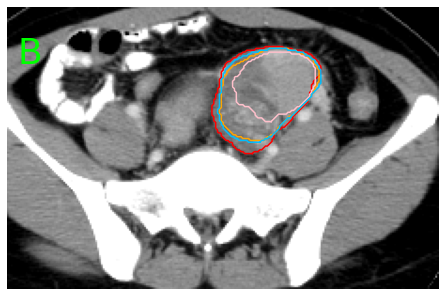

In [4]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
pred1_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_2d/"
pred2_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_lowres/"
pred3_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_fullres/"
pred4_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 70
deltay = 30
endx = 220
endy = 260

f, ax = plt.subplots()

[img, lab] = get_imgs_masks("DDR672.nii.gz")
preds = get_preds("DDR672.nii.gz")

slc_ind = 26
lab_rot = np.rot90(lab[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])

pre1 = preds[0]
pre1 = np.rot90(pre1[:, : ,slc_ind])
contours_pre1 = measure.find_contours(pre1[deltax:endx, deltay:endy])
pre2 = preds[1]
pre2 = np.rot90(pre2[:, : ,slc_ind])
contours_pre2 = measure.find_contours(pre2[deltax:endx, deltay:endy])
pre3 = preds[2]
pre3 = np.rot90(pre3[:, : ,slc_ind])
contours_pre3 = measure.find_contours(pre3[deltax:endx, deltay:endy])
pre4 = preds[3]
pre4 = np.rot90(pre4[:, : ,slc_ind])
contours_pre4 = measure.find_contours(pre4[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c0 in contours_lab:
    ax.plot(c0[:, 1], c0[:, 0], linewidth=1.5, color='red')
for c1 in contours_pre1:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='green')
for c2 in contours_pre2:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='orange')
for c3 in contours_pre3:
    ax.plot(c3[:, 1], c3[:, 0], linewidth=1.5, color='pink')
for c4 in contours_pre4:
    ax.plot(c4[:, 1], c4[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

plt.text(5, 30, "B", size=36, color='lime')
save_path = "./Figs/Fig3b.tiff"
plt.savefig(save_path, dpi=400, bbox_inches='tight', pad_inches = 0)

# plt.show()

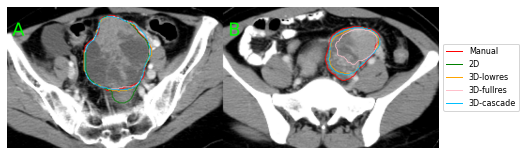

In [2]:
import skimage.io as io
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color='red', lw=1),
                Line2D([0], [0], color='green', lw=1),
                Line2D([0], [0], color='orange', lw=1),
                Line2D([0], [0], color='pink', lw=1),
                Line2D([0], [0], color='deepskyblue', lw=1)]

img1_path = './Figs/Fig3a.tiff'
img2_path = './Figs/Fig3b.tiff'

im1 = io.imread(img1_path)  
im2 = io.imread(img2_path)
# print(np.shape(im1))

im = np.zeros((1565,2400*2,4))
im[:, :2400, :] = im1.copy()
im[:, 2400:, :] = im2.copy()
im = np.array(im,dtype=np.uint8)

f, ax = plt.subplots()
ax.imshow(im)
ax.legend(custom_lines, ['Manual', '2D', '3D-lowres', '3D-fullres', '3D-cascade'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

save_path = "./Figs/Fig3.tiff"
plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches = 0)
